#  Naive Bayes

In [43]:
#importing dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
salary_data = pd.read_csv('SalaryData_Train.csv')
salary_test_data = pd.read_csv('SalaryData_Test.csv')
salary_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#mapping the Target
salary_data['Salary'] = salary_data['Salary'] .map({' <=50K' : 0, ' >50K' : 1})
salary_test_data['Salary'] = salary_test_data['Salary'].map({' <=50K' : 0, ' >50K' : 1})
salary_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,0
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [4]:
salary_data['Salary'].value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [5]:
#Transforming the text data into numerical data 
le = LabelEncoder()

In [6]:
text_colums = ["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [7]:
for i in text_colums:
    salary_data[i] = le.fit_transform(salary_data[i])
    salary_test_data[i] = le.fit_transform(salary_test_data[i])

In [8]:
#normalized data
salary_test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [9]:
salary_data.describe()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
count,30161.000000,30161.00000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.33361,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,1092.044064,88.302311,40.931269,35.413481,0.248931
std,13.134830,0.95394,3.81226,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,7406.466611,404.121321,11.980182,5.956430,0.432401
min,17.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.00000,9.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.00000,11.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,37.000000,0.000000
75%,47.000000,2.00000,12.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,37.000000,0.000000
max,90.000000,6.00000,15.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,39.000000,1.000000


## EDA

In [13]:
sns.set(rc={'figure.figsize':(8,5)})

In [17]:
c1= salary_data.columns
c = c1.drop("age")
c

Index(['workclass', 'education', 'educationno', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

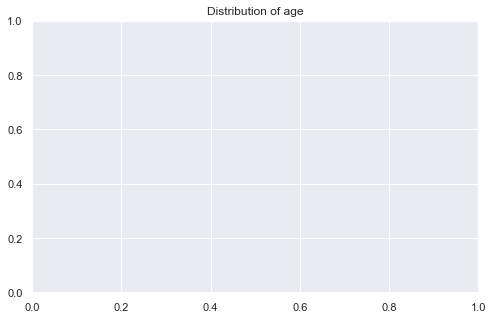

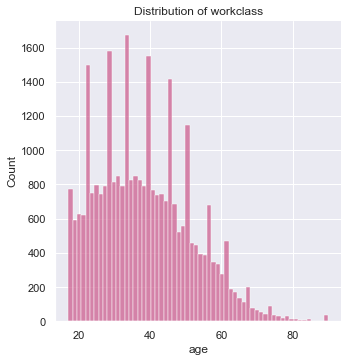

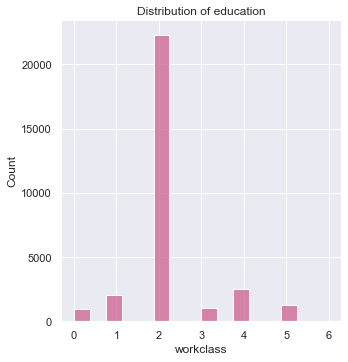

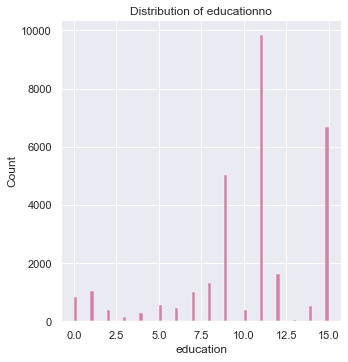

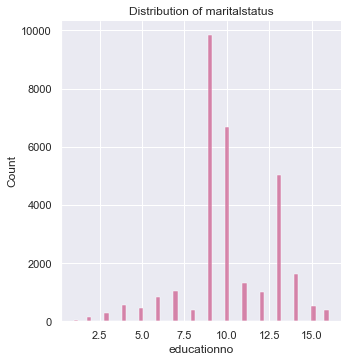

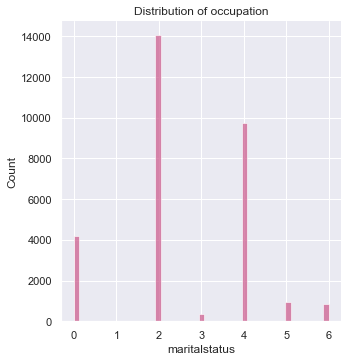

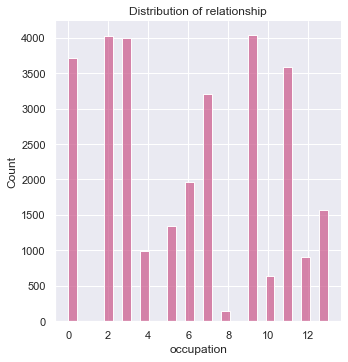

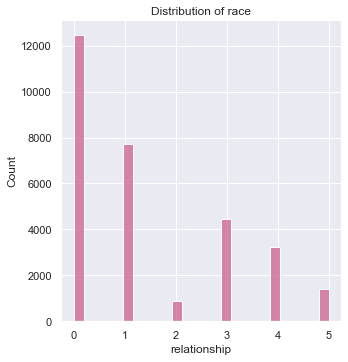

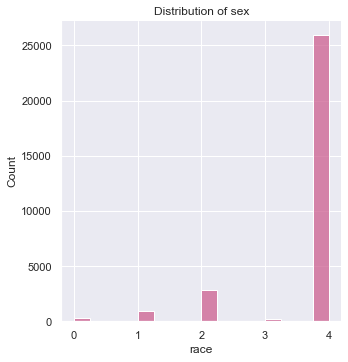

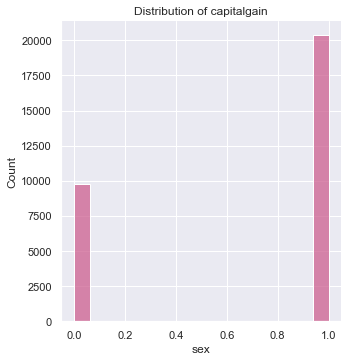

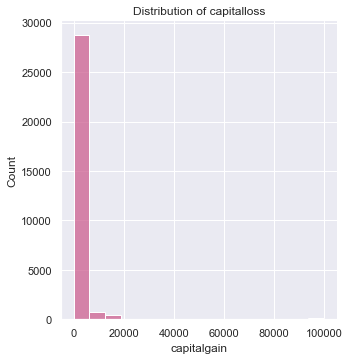

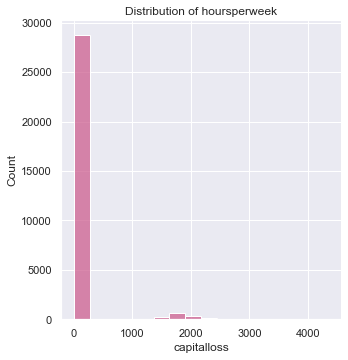

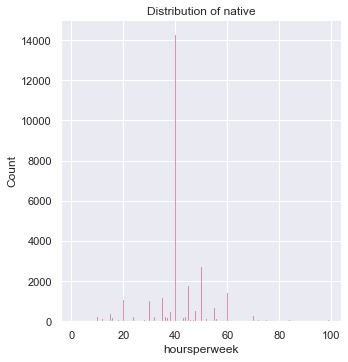

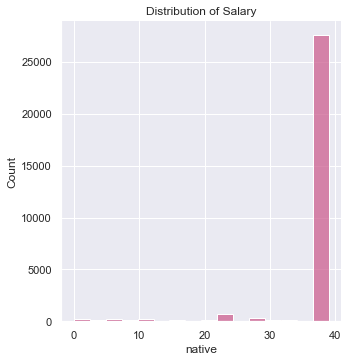

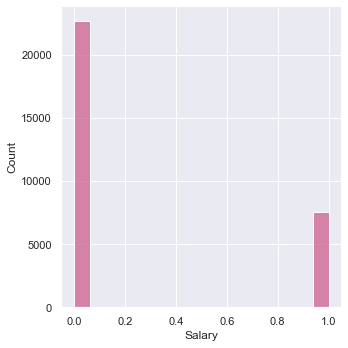

In [19]:
for i in salary_data.columns:
    plt.title("Distribution of {}".format(i))
    sns.displot(salary_data[i],color='#CD6090')

In [23]:
#correlation
corr = salary_data.corr()

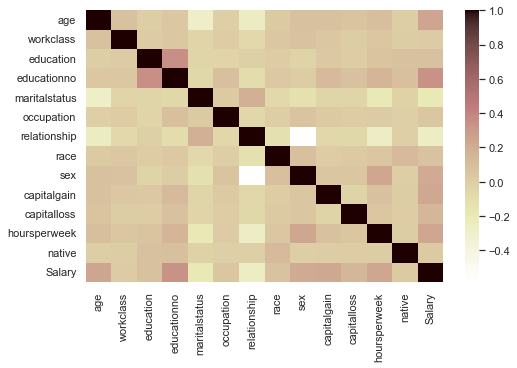

In [59]:
sns.heatmap(corr,cmap='pink_r');

In [11]:
X_train = salary_data.drop('Salary',axis=1)
Y_train = salary_data['Salary']
X_test = salary_test_data.drop('Salary',axis=1)
Y_test = salary_test_data['Salary']

In [12]:
print("Shape of X_train is" + str(X_train.shape))
print("Shape of X_test is " + str(X_test.shape))

Shape of X_train is(30161, 13)
Shape of X_test is (15060, 13)


Skew: 0.5301804771730516
Kurtosis: -0.14475966878549817


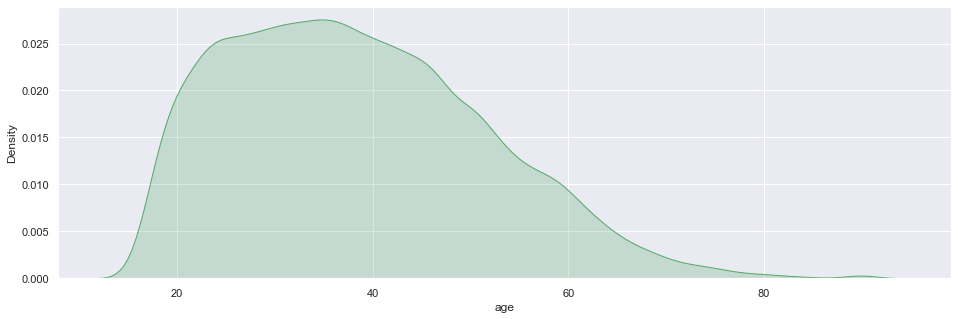

In [36]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(salary_data['age'].skew()))
print("Kurtosis: {}".format(salary_data['age'].kurtosis()))
ax = sns.kdeplot(salary_data['age'],shade=True,color='g')
plt.show()

- *for age the data is positive skewed and kurtosis is Platykurtic (low)[less outliers].*

Skew: 11.902482731802463
Kurtosis: 153.6611743759967


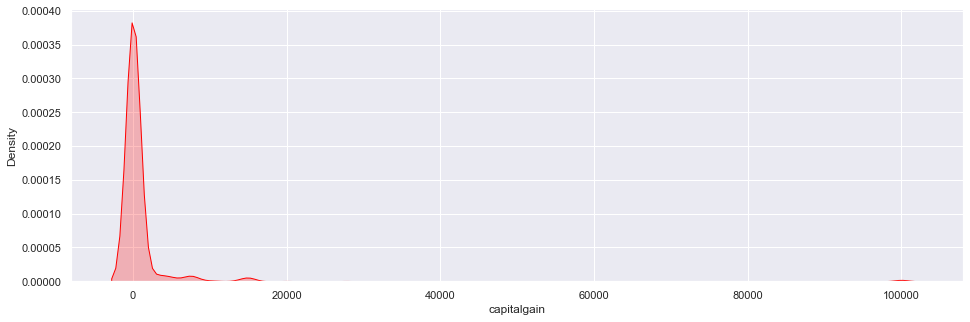

In [58]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(salary_data['capitalgain'].skew()))
print("Kurtosis: {}".format(salary_data['capitalgain'].kurtosis()))
ax = sns.kdeplot(salary_data['capitalgain'],shade=True,color='red')
plt.show()

- *for Capital Gain the data is also positive skewed and the kurtosis is high (Leptokurtic)[more outliers].*

## Model Building

In [42]:
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB()

In [54]:
#testing on training data 
a1=accuracy_score(Y_train,classifier.predict(X_train))*100
print("The Accuracy on Training data is : {}".format(round(a1)))

The Accuracy on Training data is : 80


In [55]:
#testing on testing data 
a2=accuracy_score(Y_test,classifier.predict(X_test))*100
print("The Accuracy on Test data is : {}".format(round(a2)))

The Accuracy on Test data is : 79


> **The model is very good and does not overfit.**